In [17]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages

sys.path.append('../../')

from scripts.util import *

In [26]:
result_table = pd.read_csv('herv/result_table.txt',sep='\t')

In [38]:
result_table.loc[:,result_table.columns.str.contains('comb_vs_dmso') | result_table.columns.str.contains('comb_vs_rg3039')].head()

,comb_vs_dmso_log2FC,comb_vs_dmso_pvalue,comb_vs_rg3039_log2FC,comb_vs_rg3039_pvalue
ERV:LTR12B:<hg38:chr1:46416-46493:C>:20,-0.735905,0.943916,-0.735885,0.943914
ERV:MER4D1:<hg38:chr1:92114-92392:C>:37,-2.778606,0.242784,-2.778607,0.242784
ERV:MamRep605:<hg38:chr1:99885-100421:C>:43,-2.039374,0.921737,-2.039358,0.921737
ERV:LTR33:<hg38:chr1:103375-104506:C>:45,0.231112,0.926345,0.231112,0.926345
ERV:THE1D:<hg38:chr1:119564-119944:C>:53,2.827918,0.776841,2.827917,0.776841


In [53]:
data = {}

fc_thr  = 1
pval_thr = 0.05

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

up:  788
down: 641
up:  722
down: 498
up:  788
down: 641
up:  549
down: 546
up:  637
down: 602


In [54]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

True

In [55]:
list(data.keys())

['comb_vs_dmso | up',
 'comb_vs_dmso | down',
 'comb_vs_dmso | no change',
 'comb_vs_decitabine | up',
 'comb_vs_decitabine | down',
 'comb_vs_decitabine | no change',
 'comb_vs_rg3039 | up',
 'comb_vs_rg3039 | down',
 'comb_vs_rg3039 | no change',
 'decitabine_vs_dmso | up',
 'decitabine_vs_dmso | down',
 'decitabine_vs_dmso | no change',
 'rg3039_vs_dmso | up',
 'rg3039_vs_dmso | down',
 'rg3039_vs_dmso | no change']

Text(0.5, 0.98, 'Intersections of ERV differential expression results')

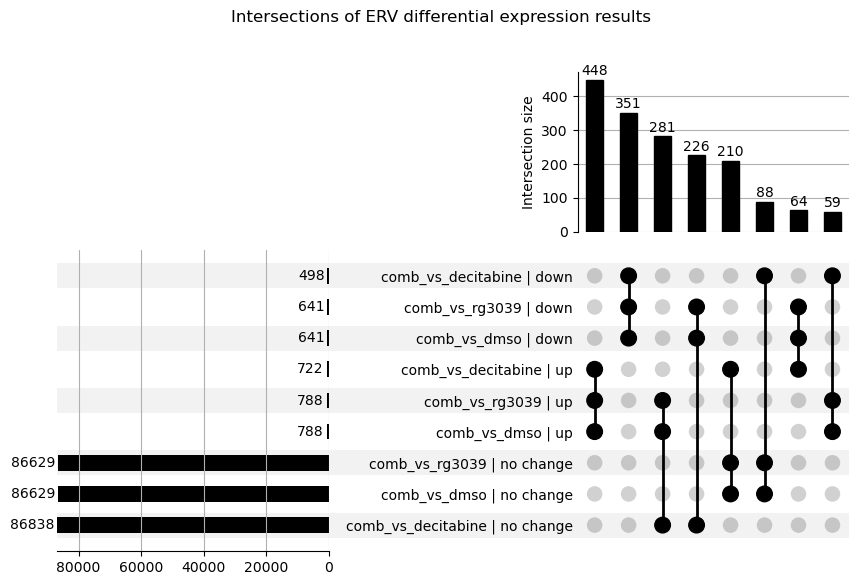

In [56]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if 'comb' in k])), 
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',
    sort_by = 'cardinality',
    max_subset_size = 10000,
    intersection_plot_elements=5,
    totals_plot_elements=8,
    # present=['comb'],
).plot(fig = fig)

fig.suptitle('Intersections of ERV differential expression results')
# fig.savefig('DAC-rg3039/RNA-seq/herv/upset.pdf')

In [57]:
!date

Sun Jun 25 03:35:16 PDT 2023
